In [5]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

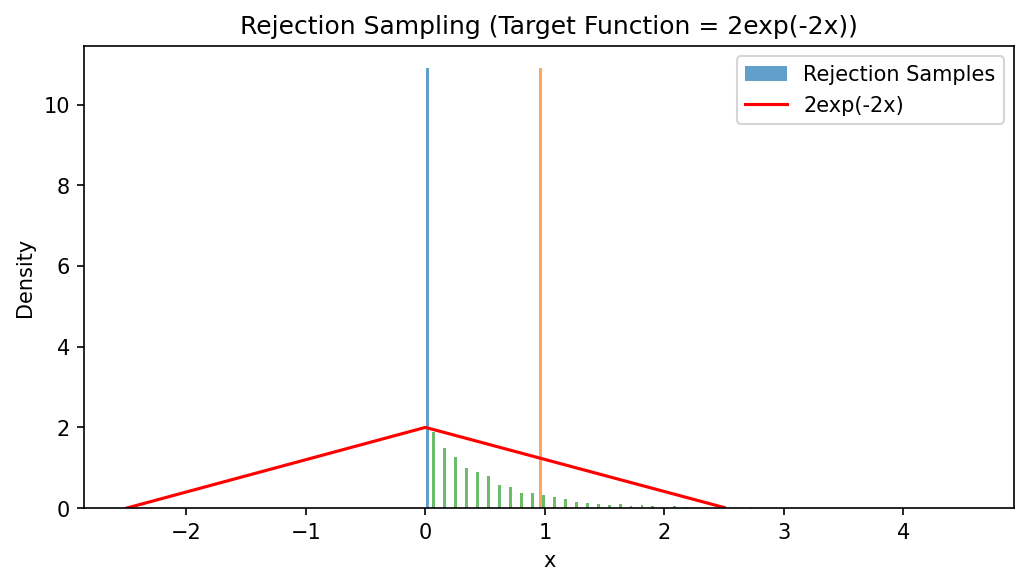

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
# Rejection sampling
plt.figure(figsize=[8,4], dpi=150)
def rejection_sampling(num_samples):
    samples = []
    for _ in range(num_samples):
            M = 2
            #Random variable from our proposed distribution
            x = scipy.stats.expon.rvs()
            #Random variable from our uniform distribution
            u = uniform.rvs()
            
            #Ratio is the realized random variable evaluated at both the proposed and the target distributions
            ratio = scipy.stats.expon.pdf(x,scale=1/2) / scipy.stats.expon.pdf(x)
            
            if u <= (ratio / M):  # Accept-reject condition
                
                samples.append(x)
    return x, u, np.array(samples)

# Generate samples
num_samples = 10000
samples=rejection_sampling(num_samples)

# Plot results of rejection sampling
x_vals = np.linspace(-2.5, 2.5, len(samples))
plt.hist(samples, bins=50, density=True,alpha=0.7, label='Rejection Samples')


#plt.plot(x_vals, samples, 'bo')
plt.plot(x_vals, scipy.stats.expon.pdf(x_vals, scale=1/2), 'r-', label='2exp(-2x)')
    
    
plt.legend()
plt.title("Rejection Sampling (Target Function = 2exp(-2x))")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()


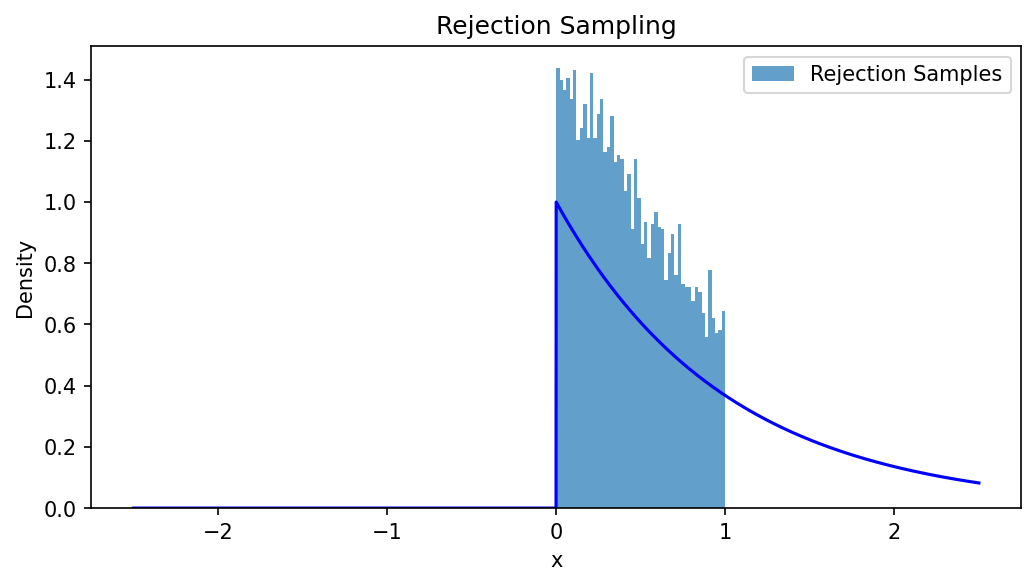

In [8]:
plt.figure(figsize=[8,4], dpi=150)
def rejection_sampling(num_samples):
    samples = []
    for _ in range(num_samples):
            M = 1
            #Random variable from our proposed distribution
            x = scipy.stats.uniform.rvs()
            
            #Random variable from our uniform distribution
            u = uniform.rvs()
            
            #Ratio is the realized random variable evaluated at both the proposed and the target distributions
            ratio = scipy.stats.expon.pdf(x) / scipy.stats.uniform.pdf(x)
            
            if u <= (ratio / M):  # Accept-reject condition
                
                samples.append(x)
    return np.array(samples)

# Generate samples
num_samples = 10000
samples=rejection_sampling(num_samples)

#Creating a plot of distribution
data = t.rvs(df=1, size=1000)

# Plot results
x_vals = np.linspace(-2.5, 2.5, len(samples))
plt.hist(samples, bins=50, density=True,alpha=0.7, label='Rejection Samples')
#plt.plot(x_vals, samples, 'bo')
plt.plot(x_vals, scipy.stats.expon.pdf(x_vals), 'b-')
    
    
plt.legend()
plt.title("Rejection Sampling")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()

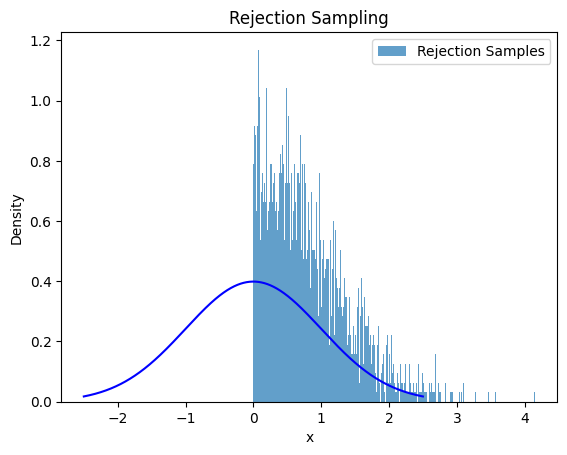

In [9]:
def rejection_sampling(num_samples, M, prop_dist, target_dist):
    samples = []
    for _ in range(num_samples):
            #Random variable from our proposed distribution
            x = prop_dist.rvs()
            #Random variable from our uniform distribution
            u = uniform.rvs()
                
            #Ratio is the realized random variable evaluated at both the proposed and the target distributions
            ratio = target_dist.pdf(x) / (M*prop_dist.pdf(x))
            
            if u <= (ratio):  # Accept-reject condition
                
                samples.append(x)
    return np.array(samples)

#Setting distributions
prop = scipy.stats.expon
target_pdf = scipy.stats.norm

#Running Rejection sampling
rejection_samples = rejection_sampling(num_samples=10000, M=.6577, prop_dist=prop, target_dist=target_pdf)



x_vals = np.linspace(-2.5, 2.5, len(samples))
plt.hist(rejection_samples, bins=1000, density=True,alpha=0.7, label='Rejection Samples')
#plt.plot(x_vals, samples, 'bo')
plt.plot(x_vals,scipy.stats.norm.pdf(x_vals), 'b-')
    

    
plt.legend()
plt.title("Rejection Sampling")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()


Rejection sampling works in the following way:
$\space$

Our goal is to show X $\sim$ p(x).

Background: When we pull a random sample from q(x) theres a chance we accept or reject the sample. This chance is a r.v that we call $Z$. $Z$ can take on values 1 or 0, either accept or reject the condition. This makes $Z$ $\sim$ $Bernoulli(\frac{f(x)}{Mg(x)})$. Here, we'll call the r.v we pull from our proposed distribution, $q(x)$ $K$. It follows that $K \sim q(x)$. We're intersted in the following result:

$$K | Z=1$$

Essentially, what is the distribution of K given we accept the condition? By doing so, we bound our r.v and can show K comes from the same distribution as $X$. The motivation comes from:
$$Pr(X \in A) = \int_{A} f(x),dx = F(A)$$

over some sample space A.
\space
If X and K share the same sample space after the accepting the condition then it follows:
$$
Pr(X \in A) = Pr((K | Z=1) \in  A ) = Pr(K \in A | Z=1) 
$$

Using Bayes Theorem:
$$
Pr(K \in A | Z=1) = \frac{Pr(Z = 1 | K \in A) \cdot Pr(K \in A)}{Pr(Z=1)}
$$

Focus on $Pr(Z = 1 | K \in A)$:

$$
Pr(Z = 1 | K \in A) = \frac{Pr(Z=1 \cap K \in A)}{Pr(Z=1)}
$$

Plugging this back into $Pr(K \in A | Z=1)$:
$$
Pr(K \in A | Z=1) = \frac{Pr(Z=1 \cap K \in A)}{Pr(Z=1)}
$$

Looking deeper into $Pr(Z=1 \cap K \in A)$:
By the law of Total Probability
$$
Pr(Z=1 \cap K \in A) = \int_{A} f_{Z \cap K} (1,k), dx = \int_{A} f_{Z=1}(1,k)\cdot g(x),dx = \int_{A} (\frac{f(x)}{Mg(x)})\cdot g(x),dx
\Rightarrow \int_{A} \frac{f(x)}{M},dx = \frac{1}{M} \int_{A}f(x),dx = \frac{1}{M} Pr(X \in A) = \frac{1}{M} \cdot F(A)
$$


Now we turn our focus to $Pr(Z=1)$, the probability of acceptance:
$$
Pr(Z=1) = \iint_{0}^{\frac{f(x)}{Mg(x)}} g(x)\,dydx = \int_{D} \frac{f(x)}{Mg(x)}\,dx = \frac{1}{M} \int_D \frac{f(x)}{g(x)}\,dx = \frac{1}{M}
$$
Finishing up:
$$
Pr(K \in A | Z=1) = \frac{\frac{1}{M} Pr(X \in A)}{\frac{1}{M}} = Pr(X \in A)
$$


$1- \frac{1}{d+1}$

In [156]:
def p(x):
    return scipy.stats.t.pdf(x, df=1)
def q(x):
    return scipy.stats.norm.pdf(x)




def new_algo(iterations, p, q):
    x_two = []  # Accepted samples
    alpha_list = []
    i = iterations
    j = 0
    while i > 0:
        # Draw samples from the proposal distribution q and the target distribution p
        rv_prime = q.rvs()  # Sample from q (no need to pass loc and scale if q is already defined)
        rv_one = p.rvs()  # Sample from p

        # Evaluate the PDFs
        p_prime = p.pdf(rv_prime)  # p evaluated at rv_prime
        p_one = p.pdf(rv_one)  # p evaluated at rv_one

        q_prime = q.pdf(rv_prime)  # q evaluated at rv_prime
        q_one = q.pdf(rv_one)  # q evaluated at rv_one

        # Calculate the acceptance probability
        alpha = min(1, ((p_prime * q_one) / (q_prime * p_one)))
        
        alpha_list.append(alpha)
        
        # Random draw from a uniform distribution
        u = scipy.stats.uniform.rvs()
        # Acceptance/rejection step
        
        if u < alpha:
            
            x_two.append(rv_prime) # Accept rv_prime
            j += 1
            i -= 1
        else:
            x_two.append(rv_one)
            i -= 1
    return x_two, np.mean(alpha_list), j




p=scipy.stats.norm(loc=1, scale=2)
q=scipy.stats.norm(loc=0, scale=1)
accepted, alpha_mean, l_than = new_algo(10000, q=p, p=q)
print(f"Samples accepted: {len(accepted)}")
print(f'Average alpha: {alpha_mean}')
print(f'Accepted condition {l_than}')
    
    



Samples accepted: 10000
Average alpha: 0.509136657577738
Accepted condition 5108


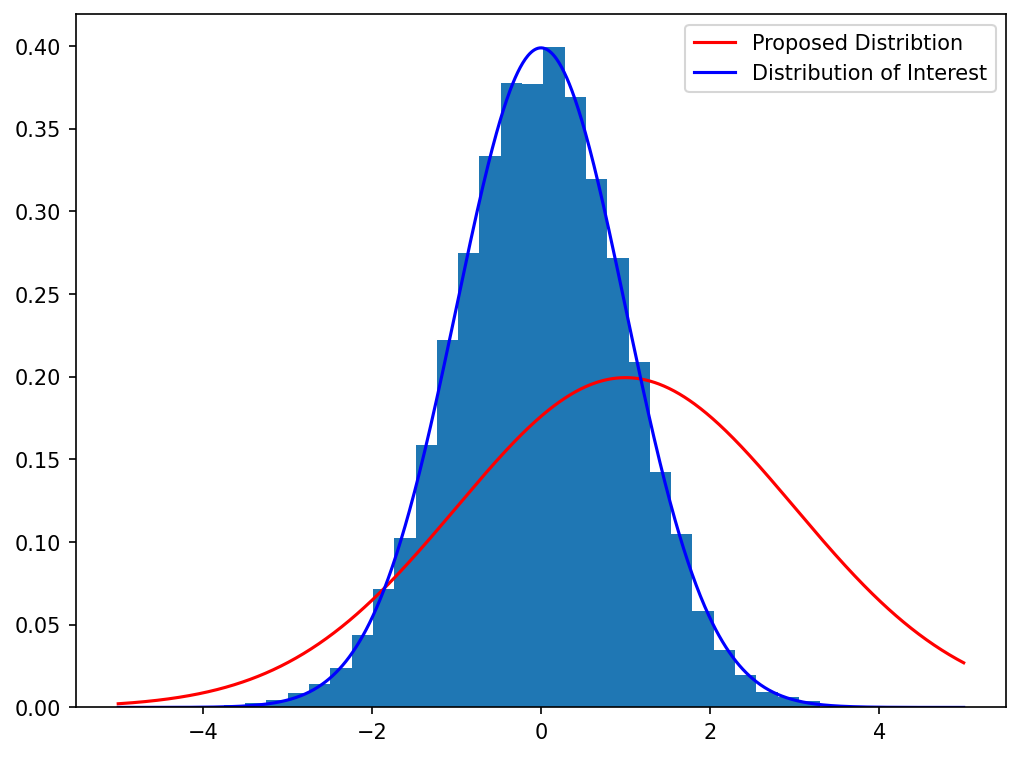

In [152]:
plt.figure(figsize=[8,6], dpi=150)
x_vals = np.linspace(-5, 5, 1000)
plt.plot(x_vals, p.pdf(x_vals), 'r-', )
plt.plot(x_vals, q.pdf(x_vals), 'b-')

plt.legend(['Proposed Distribtion','Distribution of Interest'])


plt.hist(accepted, density=True, bins=30)
#plt.hist(rejected, density=True, bins=True)
plt.show()

Samples accepeted: 10000


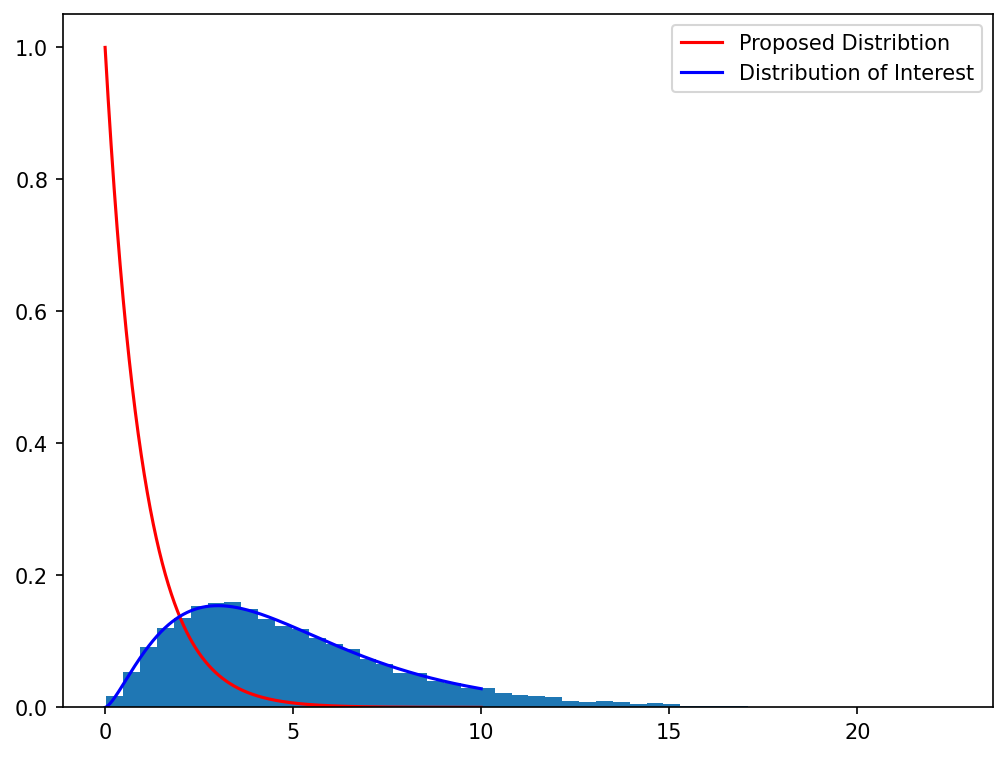

In [48]:

#Setting p and q
p=scipy.stats.expon()
q=scipy.stats.chi2(df=5)
accepted= new_algo(10000, q=p, p=q)


print(f"Samples accepeted: {len(accepted)}")
  
#Making the charts
plt.figure(figsize=[8,6], dpi=150)
x_vals = np.linspace(0, 10, 1000)
plt.plot(x_vals, p.pdf(x_vals), 'r-', )
plt.plot(x_vals, q.pdf(x_vals), 'b-')

plt.legend(['Proposed Distribtion','Distribution of Interest'])


plt.hist(accepted, density=True, bins=50)
#plt.hist(rejected, density=True, bins=20, stacked=True)
#plt.hist(rejected, density=True, bins=True)
plt.show()

1.0


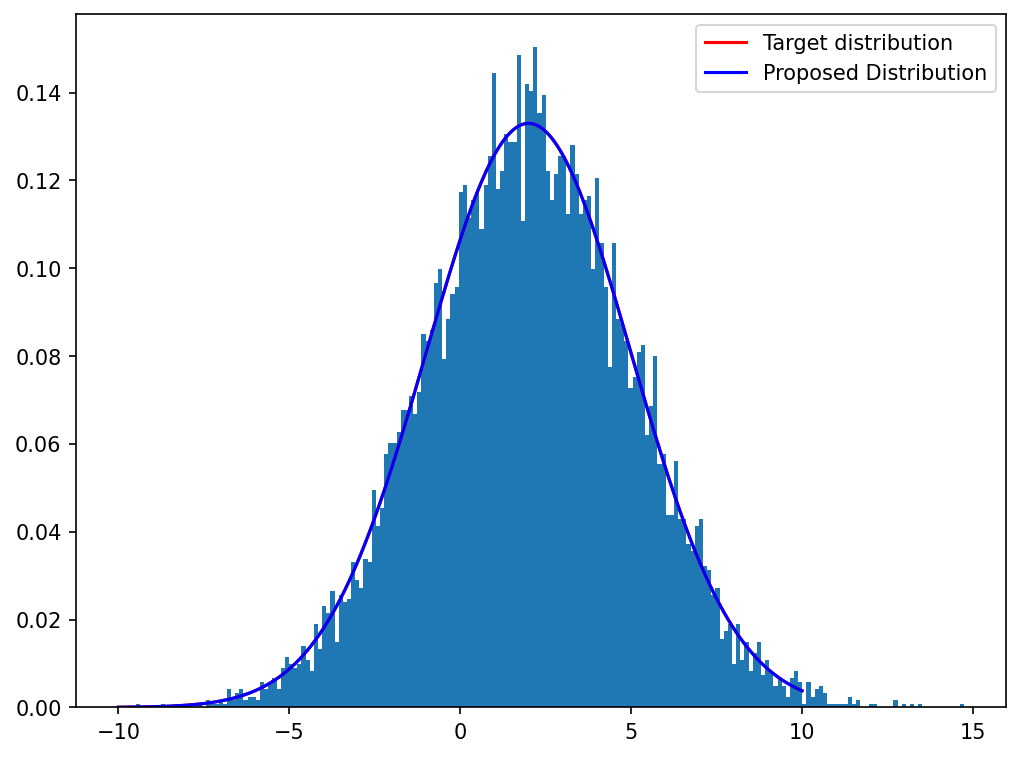

In [106]:
def mh_algo(num_iterations, target, proposed):
    x = [0]
    accepted = 0
    for i in range(1, num_iterations):
        rv_prime = proposed.rvs()
        
        proposed_prime = proposed.pdf(rv_prime)
        target_prime = target.pdf(rv_prime)
        
        target_one = target.pdf(x[i-1])
        proposed_one = proposed.pdf(x[i-1])
        
        alpha = min(1, ((proposed_one * target_prime) / (proposed_prime * target_one) ))
        
        u = scipy.stats.uniform.rvs()
        
        if u < alpha:
            x.append(rv_prime)
            accepted += 1
        else:
            x.append(x[i-1])
            
    print(round(accepted / num_iterations, 2))   
      
    return x



target_norm=scipy.stats.norm(loc=2, scale=3)
proposed_norm=scipy.stats.norm(loc=2, scale=3)

accepted = mh_algo(num_iterations=10000,
                   target=target_norm,
                   proposed=proposed_norm)


plt.figure(figsize=[8,6], dpi=150)
x_vals = np.linspace(-10, 10, 1000)



plt.hist(accepted, density=True, bins=200)
plt.plot(x_vals, target_norm.pdf(x_vals), 'r-')
plt.plot(x_vals, proposed_norm.pdf(x_vals), 'b-')
plt.legend(['Target distribution', 'Proposed Distribution'])


plt.show()


In [87]:
len(accepted)

10000

(array([0.00083291, 0.00333164, 0.00416455, 0.01124429, 0.01915694,
        0.03289997, 0.06663285, 0.09661763, 0.13201633, 0.18032515,
        0.23779598, 0.29360099, 0.3839718 , 0.34565791, 0.36731359,
        0.37231105, 0.36731359, 0.344825  , 0.28027442, 0.19739982,
        0.15617074, 0.10203155, 0.07371259, 0.04164553, 0.0270696 ,
        0.01540885, 0.00791265, 0.00083291, 0.00166582, 0.00041646]),
 array([-3.55898625, -3.31886445, -3.07874264, -2.83862084, -2.59849904,
        -2.35837724, -2.11825544, -1.87813363, -1.63801183, -1.39789003,
        -1.15776823, -0.91764643, -0.67752462, -0.43740282, -0.19728102,
         0.04284078,  0.28296258,  0.52308439,  0.76320619,  1.00332799,
         1.24344979,  1.4835716 ,  1.7236934 ,  1.9638152 ,  2.203937  ,
         2.4440588 ,  2.68418061,  2.92430241,  3.16442421,  3.40454601,
         3.64466781]),
 <BarContainer object of 30 artists>)

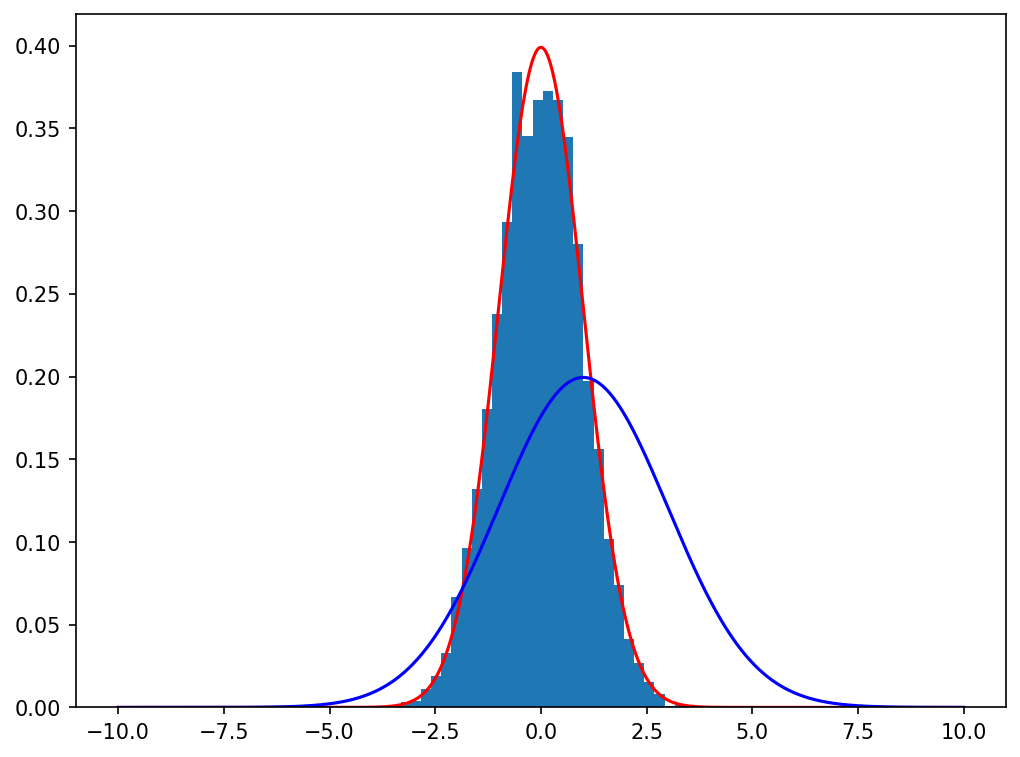

In [71]:
x = [0]
for i in range(1, 10000):
        rv_prime = scipy.stats.norm(loc=1, scale=2).rvs()
        
        
        p_prime = scipy.stats.norm().pdf(rv_prime)
        q_prime = scipy.stats.norm(loc=1, scale=2).pdf(rv_prime)
        
        q_one = scipy.stats.norm(loc=1, scale=2).pdf(x[i-1])
        p_one = scipy.stats.norm().pdf(x[i-1])
        
        
        alpha = min(1, ((p_prime * q_one) / (q_prime* p_one)))
        
        u = scipy.stats.uniform.rvs()
        
        if u < alpha:
            x.append(rv_prime)
        else:
            x.append(x[i-1])
            
            
            
plt.figure(figsize=[8,6], dpi=150)
x_vals = np.linspace(-10, 10, 1000)
plt.plot(x_vals, scipy.stats.norm().pdf(x_vals), 'r-', )
plt.plot(x_vals, scipy.stats.norm(loc=1, scale=2).pdf(x_vals), 'b-')
plt.hist(x, density=True, bins=30)


4999
[1.0852481540037362, 1.0852481540037362, 1.0852481540037362, -2.1908261648935077, -1.991875211757626, -1.991875211757626, -2.1287407517078227, -2.1287407517078227, 0.6398410805095562, 0.24127000388792205, 1.6068733845912249, 1.6068733845912249, 1.6068733845912249, 1.6068733845912249, 1.6068733845912249, 2.2859628166305073, 2.2859628166305073, 2.2859628166305073, 2.2859628166305073, 2.2859628166305073, 2.2859628166305073, 2.2859628166305073, 2.2859628166305073, 2.2859628166305073, 2.2859628166305073, 2.2859628166305073, 2.1237792225270997, 2.1237792225270997, 1.1150945865805764, -1.563855297388851, -1.563855297388851, 0.02931776589610644, 0.397938684856816, 0.4325759325548143, -0.6807300141978712, 0.06635888997557013, 0.7342763617821675, 0.7342763617821675, 0.7342763617821675, 0.7342763617821675, 0.8176834980441721, -0.33829740041746875, 0.5847959769267892, -0.29234647079487397, -0.9164946025455961, 1.4778500273103683, 1.4778500273103683, -0.5753439496833321, -1.4670603348962432, -

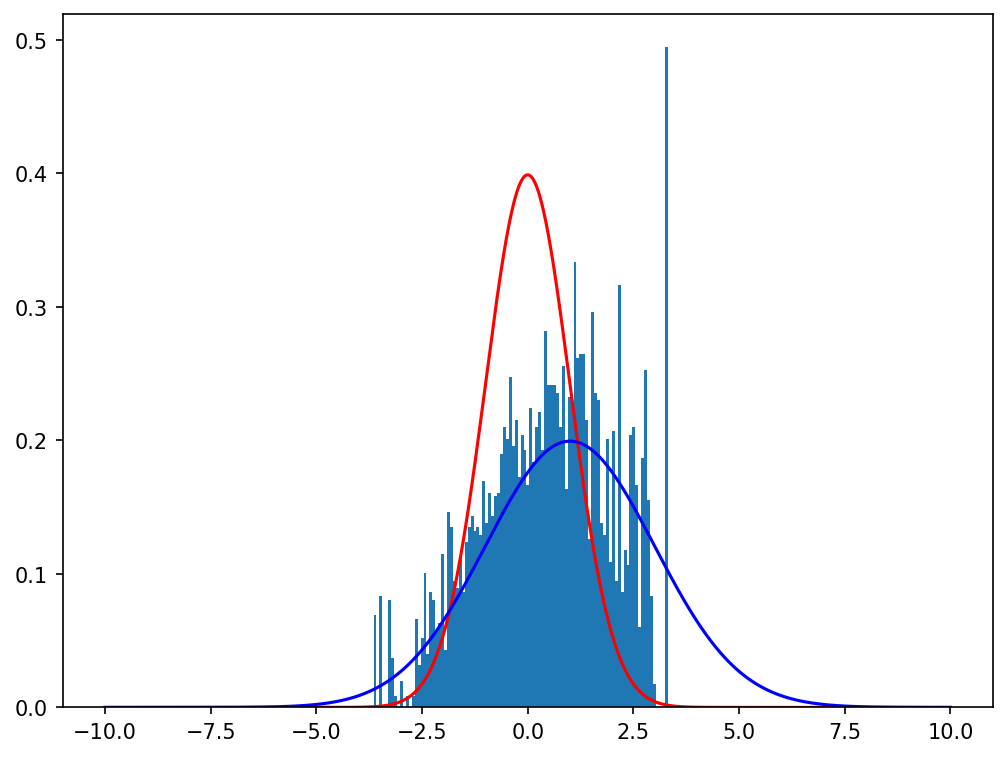

In [ ]:
#(1/29/24) algorithm

def mh_algo(num_iterations, p, q):
    x = [0]
    for i in range(1, num_iterations):
        rv_prime = q.rvs()
        
        
        alpha = min(1, (p.pdf(rv_prime) * q.pdf(x[i-1])) / (p.pdf(x[i-1]) * q.pdf(rv_prime)))
        
        u = scipy.stats.uniform.rvs()
        
        if u < alpha:
            x.append(rv_prime)
        else:
            x.append(x[i-1])

    return x[1:]



p=scipy.stats.norm()
q=scipy.stats.norm(loc=1, scale=2)
accepted= mh_algo(5000, q=q, p=p)
print(len(accepted))


#Making the charts
plt.figure(figsize=[8,6], dpi=150)
x_vals = np.linspace(-10, 10, 1000)
plt.plot(x_vals, p.pdf(x_vals), 'r-', )
plt.plot(x_vals, q.pdf(x_vals), 'b-')

#plt.legend(['Proposed Distribtion','Distribution of Interest'])


plt.hist(accepted, density=True, bins=100)
#plt.hist(rejected, density=True, bins=20, stacked=True)
#plt.hist(rejected, density=True, bins=True)
plt.show()

In [136]:
x_two = []
n = 0
for i in range(0,10000):
    s_norm = scipy.stats.norm.rvs()
    one_norm = scipy.stats.norm(scale=2).rvs()
    
    p_prime = scipy.stats.norm.pdf(one_norm)
    q_prime = scipy.stats.norm(scale=2).pdf(one_norm)

    q_sub = scipy.stats.norm(scale=2).pdf(s_norm)
    p_sub = scipy.stats.norm.pdf(s_norm)
    
    alpha = min(1, ((p_prime * q_sub) / (q_prime * p_sub)))
    
    u = scipy.stats.uniform.rvs()
    if u < alpha:
        print(f'Test passed: {alpha}' )
        n += 1
        x_two.append(one_norm)
    else:
        x_two.append(s_norm)    
    

Test passed: 0.3643745991108088
Test passed: 0.3426661562914869
Test passed: 1
Test passed: 1
Test passed: 0.7781382394327058
Test passed: 1
Test passed: 1
Test passed: 1
Test passed: 1
Test passed: 1
Test passed: 0.9731625203311213
Test passed: 1
Test passed: 1
Test passed: 1
Test passed: 0.8580603061160347
Test passed: 0.9547494906927301
Test passed: 0.04746761176509377
Test passed: 0.8345804828206184
Test passed: 1
Test passed: 0.9874595942235718
Test passed: 0.8087678136948883
Test passed: 0.6021363426952959
Test passed: 0.7731629820317932
Test passed: 1
Test passed: 1
Test passed: 0.9496061207455726
Test passed: 0.46944371188401857
Test passed: 1
Test passed: 0.8164270005365197
Test passed: 1
Test passed: 0.5838848985860853
Test passed: 1
Test passed: 0.8742821283901749
Test passed: 0.6590014254824553
Test passed: 1
Test passed: 1
Test passed: 0.9310604566890172
Test passed: 0.595676767244072
Test passed: 1
Test passed: 0.7812776565737304
Test passed: 0.7545964257131174
Test passe

In [137]:
n

5910

<AxesSubplot: ylabel='Count'>

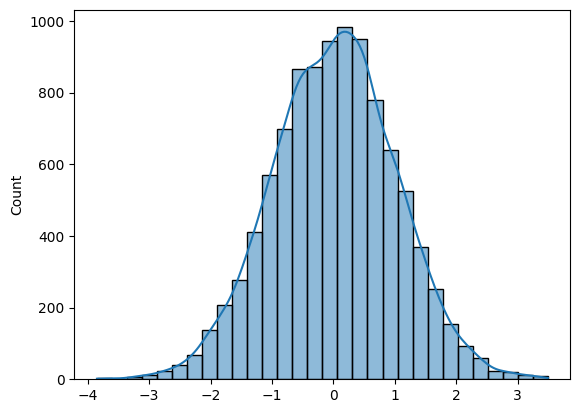

In [138]:
import seaborn as sn
sn.histplot(x=x_two, kde=True, bins=30)

In [52]:
#Metric for volatility testing:
#-Beta
#-Alpha
#-R-squared